<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Python_gen_ai_day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using font: DejaVu Sans


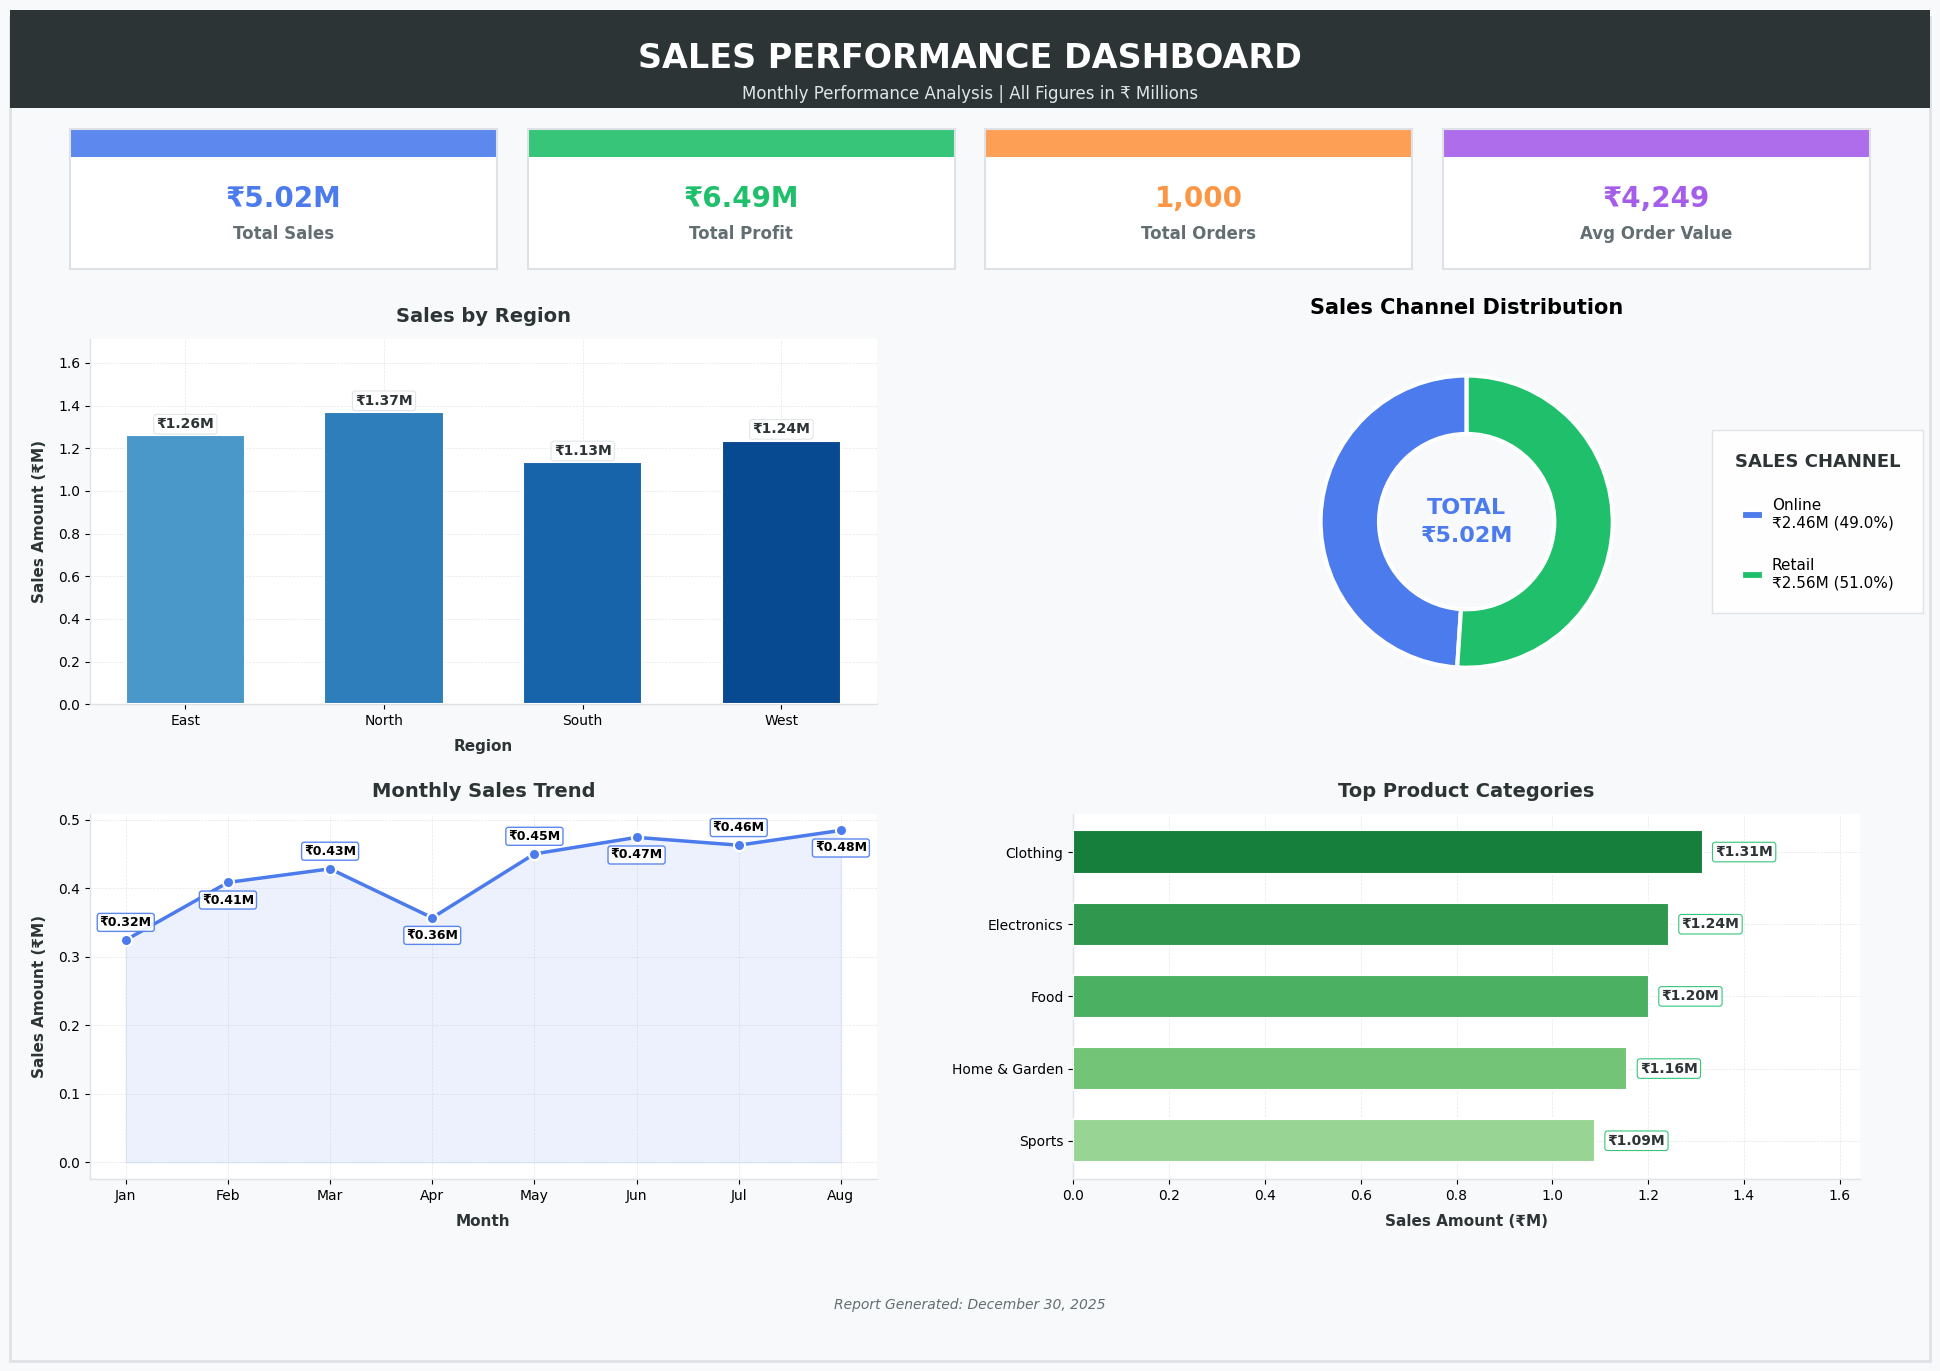

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib

# ================= DATASET =================
top_kpis = {
    'Total_Sales': 5020000,
    'Total_Profit': 6490000,
    'Total_Orders': 1000,
    'Avg_Order_Value': 4249
}

region_kpis = pd.DataFrame({
    'Region': ['East', 'North', 'South', 'West'],
    'Sales_Amount': [1.259792, 1.369612, 1.134250, 1.235608]
})

channel_sales = pd.DataFrame({
    'Sales_Channel': ['Online', 'Retail'],
    'Sales_Amount': [2.456833, 2.560431]
})

monthly_sales = pd.DataFrame({
    'Month_Name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
    'Sales_Amount': [0.324468, 0.408477, 0.428311, 0.356903, 0.450076, 0.474189, 0.462792, 0.484391]
})

product_sales = pd.DataFrame({
    'Product_Category': ['Clothing', 'Electronics', 'Food', 'Home & Garden', 'Sports'],
    'Sales_Amount': [1.313874, 1.243499, 1.201773, 1.156789, 1.089234]
})

# ================= STYLE SETUP =================
# Check available fonts and set one that supports rupee symbol
available_fonts = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

# Try to find a font that supports rupee symbol - common ones that work:
# 'DejaVu Sans', 'Arial', 'Liberation Sans', 'Ubuntu', 'FreeSans'
preferred_fonts = ['DejaVu Sans', 'Arial', 'Liberation Sans', 'Ubuntu', 'FreeSans', 'Nirmala UI', 'Segoe UI']

# Find the first available font from preferred list
selected_font = 'DejaVu Sans'  # Default
for font in preferred_fonts:
    if font in available_fonts:
        selected_font = font
        break

print(f"Using font: {selected_font}")

# Set style
plt.rcParams.update({
    'figure.figsize': (20, 14),
    'figure.facecolor': '#f8f9fa',
    'font.size': 10,
    'font.family': selected_font,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.titlepad': 12,
    'axes.labelweight': 'bold',
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5
})

BG_COLOR = "#f8f9fa"
CARD_COLOR = "#ffffff"
BORDER_COLOR = "#dee2e6"
TITLE_COLOR = "#2d3436"
PRIMARY = "#4b7bec"
SECONDARY = "#20bf6b"
TERTIARY = "#fd9644"
QUATERNARY = "#a55eea"

# Create figure WITHOUT tight layout
fig = plt.figure(facecolor=BG_COLOR, dpi=100, constrained_layout=False)

# ================= MAIN CONTAINER =================
main_border = plt.Rectangle((0.02, 0.02), 0.96, 0.96,
                           linewidth=2,
                           edgecolor=BORDER_COLOR,
                           facecolor='none',
                           transform=fig.transFigure,
                           zorder=1)
fig.add_artist(main_border)

# ================= HEADER SECTION =================
header_bg = plt.Rectangle((0.02, 0.915), 0.96, 0.07,
                         linewidth=0,
                         edgecolor='none',
                         facecolor=TITLE_COLOR,
                         transform=fig.transFigure,
                         zorder=2)
fig.add_artist(header_bg)

# Title
fig.text(0.5, 0.95, "SALES PERFORMANCE DASHBOARD",
         ha="center", va="center",
         fontsize=24, fontweight="bold",
         color="white", zorder=3)

# Subtitle - Use rupee symbol
fig.text(0.5, 0.925, "Monthly Performance Analysis | All Figures in ₹ Millions",
         ha="center", va="center",
         fontsize=12, fontweight="normal",
         color="#dfe6e9", zorder=3)

# ================= KPI CARDS SECTION =================
# Create a grid for KPI cards with explicit positioning
kpi_grid = plt.GridSpec(1, 12,
                       left=0.05, right=0.95,
                       top=0.90, bottom=0.80,
                       wspace=0.25, hspace=0)

kpi_titles = ["Total Sales", "Total Profit", "Total Orders", "Avg Order Value"]
# Use rupee symbol with proper formatting
kpi_values = [
    f"₹{top_kpis['Total_Sales']/1e6:.2f}M",
    f"₹{top_kpis['Total_Profit']/1e6:.2f}M",
    f"{top_kpis['Total_Orders']:,}",
    f"₹{top_kpis['Avg_Order_Value']:,.0f}"
]
kpi_colors = [PRIMARY, SECONDARY, TERTIARY, QUATERNARY]
kpi_positions = [(0, 0, 3), (0, 3, 3), (0, 6, 3), (0, 9, 3)]

# Create KPI cards
kpi_axes = []
for idx, (row, start_col, span) in enumerate(kpi_positions):
    ax = plt.subplot(kpi_grid[row, start_col:start_col+span])
    ax.set_facecolor(CARD_COLOR)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Add colored top bar
    top_bar = plt.Rectangle((0, 0.8), 1, 0.2,
                           facecolor=kpi_colors[idx],
                           edgecolor='none',
                           transform=ax.transAxes,
                           alpha=0.9)
    ax.add_patch(top_bar)

    # Add border
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1.5)

    # Add KPI value
    ax.text(0.5, 0.5, kpi_values[idx],
            ha="center", va="center",
            fontsize=20, fontweight="bold",
            color=kpi_colors[idx])

    # Add KPI title
    ax.text(0.5, 0.25, kpi_titles[idx],
            ha="center", va="center",
            fontsize=12, fontweight="bold",
            color="#636e72")

    kpi_axes.append(ax)

# ================= CHARTS SECTION =================
# Create a 2x2 grid for charts with proper spacing - ADJUSTED SPACING
charts_grid = plt.GridSpec(2, 2,
                          left=0.06, right=0.945,
                          top=0.75, bottom=0.15,  # More bottom space for footer
                          hspace=0.3, wspace=0.25)  # Increased spacing

# Create chart axes
ax1 = plt.subplot(charts_grid[0, 0])  # Sales by Region
ax2 = plt.subplot(charts_grid[0, 1])  # Sales Channel Distribution
ax3 = plt.subplot(charts_grid[1, 0])  # Monthly Sales Trend
ax4 = plt.subplot(charts_grid[1, 1])  # Top Products

# List of all chart axes for styling
chart_axes = [ax1, ax2, ax3, ax4]

# Apply consistent styling to all charts
for ax in chart_axes:
    ax.set_facecolor(CARD_COLOR)
    # Style spines
    for spine in ax.spines.values():
        spine.set_edgecolor(BORDER_COLOR)
        spine.set_linewidth(1)
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set tick parameters
    ax.tick_params(axis='both', which='both', labelsize=10)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# ================= CHART 1: SALES BY REGION =================
ax1.set_title("Sales by Region", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Create gradient colors for bars
region_colors = plt.cm.Blues(np.linspace(0.6, 0.9, len(region_kpis)))
bars = ax1.bar(region_kpis['Region'],
               region_kpis['Sales_Amount'],
               color=region_colors,
               edgecolor='white',
               linewidth=1.5,
               width=0.6,
               zorder=3)

ax1.set_xlabel("Region", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)
ax1.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹
ax1.set_ylim(0, max(region_kpis['Sales_Amount']) * 1.25)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.,
             height + 0.02,
             f'₹{height:.2f}M',  # Using ₹
             ha='center', va='bottom',
             fontsize=10, fontweight='bold',
             color=TITLE_COLOR,
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                      edgecolor=BORDER_COLOR, linewidth=0.8, alpha=0.9))

# ================= CHART 2: SALES CHANNEL DISTRIBUTION =================
ax2.set_title("Sales Channel Distribution", fontsize=15, fontweight="bold", pad=18)
ax2.set_aspect("equal")

# Create donut chart
colors = [PRIMARY, SECONDARY]
wedges, texts = ax2.pie(
    channel_sales["Sales_Amount"],
    labels=None,
    startangle=90,
    colors=colors,
    wedgeprops=dict(
        width=0.4,
        edgecolor='white',
        linewidth=3,
        antialiased=True
    )
)

# Create detailed legend with better formatting
total = channel_sales["Sales_Amount"].sum()
legend_labels = []

for channel, sales in zip(channel_sales["Sales_Channel"], channel_sales["Sales_Amount"]):
    percentage = sales/total * 100
    # Format: "Online\n₹2.46M (49.0%)"
    legend_labels.append(f"{channel}\n₹{sales:.2f}M ({percentage:.1f}%)")

# Position legend properly with better spacing
legend = ax2.legend(
    wedges,
    legend_labels,
    title="SALES CHANNEL",
    loc="center left",
    bbox_to_anchor=(1.15, 0.5),  # Moved further right for more space
    fontsize=11,
    frameon=True,
    fancybox=False,  # Changed to False for cleaner box
    shadow=False,
    framealpha=0.95,
    borderpad=1.5,    # More padding
    labelspacing=1.8, # More spacing between labels
    handlelength=1.5, # Longer color handles
    handletextpad=0.5, # Space between color and text
    title_fontsize=13, # Larger title
    edgecolor=BORDER_COLOR,
    facecolor='white'
)

# Make legend title bold
legend.get_title().set_fontweight('bold')
legend.get_title().set_color(TITLE_COLOR)

# Add center text with better visibility
center_text = f"TOTAL\n₹{total:.2f}M"
ax2.text(
    0, 0,
    center_text,
    ha='center',
    va='center',
    fontsize=16,        # Larger font
    fontweight='bold',
    color=PRIMARY,      # Use primary color for emphasis
    linespacing=1.5     # Better line spacing
)

# Remove axes for cleaner look
ax2.axis('off')

# ================= CHART 3: MONTHLY SALES TREND =================
ax3.set_title("Monthly Sales Trend", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Plot line chart
ax3.plot(monthly_sales['Month_Name'],
         monthly_sales['Sales_Amount'],
         marker='o',
         linewidth=2.5,
         color=PRIMARY,
         markersize=8,
         markerfacecolor=PRIMARY,
         markeredgecolor='white',
         markeredgewidth=1.5,
         zorder=3)

# Add fill under the line
ax3.fill_between(range(len(monthly_sales)),
                 monthly_sales['Sales_Amount'],
                 alpha=0.1,
                 color=PRIMARY)

ax3.set_xlabel("Month", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)
ax3.set_ylabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹

# Add value labels
for i, (month, sales) in enumerate(zip(monthly_sales['Month_Name'], monthly_sales['Sales_Amount'])):
    ax3.annotate(f'₹{sales:.2f}M',  # Using ₹
                 xy=(i, sales),
                 xytext=(0, 8 if i % 2 == 0 else -8),
                 textcoords='offset points',
                 ha='center', va='bottom' if i % 2 == 0 else 'top',
                 fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.2',
                          facecolor='white',
                          edgecolor=PRIMARY,
                          alpha=0.9))

# ================= CHART 4: TOP PRODUCT CATEGORIES =================
ax4.set_title("Top Product Categories", fontsize=14, fontweight="bold", pad=12, color=TITLE_COLOR)

# Sort data for horizontal bar chart
sorted_products = product_sales.sort_values('Sales_Amount', ascending=True)

# Create horizontal bars with gradient colors
product_colors = plt.cm.Greens(np.linspace(0.4, 0.8, len(sorted_products)))
bars = ax4.barh(range(len(sorted_products)),
                sorted_products['Sales_Amount'],
                color=product_colors,
                edgecolor='white',
                linewidth=1.5,
                height=0.6,
                zorder=3)

ax4.set_yticks(range(len(sorted_products)))
ax4.set_yticklabels(sorted_products['Product_Category'], fontsize=10)
ax4.set_xlabel("Sales Amount (₹M)", fontsize=11, fontweight="bold", labelpad=8, color=TITLE_COLOR)  # Using ₹

# Add value labels
max_sales = sorted_products['Sales_Amount'].max()
for i, (bar, sales) in enumerate(zip(bars, sorted_products['Sales_Amount'])):
    width = bar.get_width()
    ax4.text(width + max_sales * 0.02,
             bar.get_y() + bar.get_height()/2,
             f'₹{sales:.2f}M',  # Using ₹
             ha='left', va='center',
             fontsize=10, fontweight='bold',
             color=TITLE_COLOR,
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                      edgecolor=SECONDARY, linewidth=0.8, alpha=0.9))

ax4.set_xlim(0, max_sales * 1.25)

# ================= FOOTER =================
# Add simple timestamp
timestamp = pd.Timestamp.now().strftime("%B %d, %Y")
fig.text(0.5, 0.06,
         f"Report Generated: {timestamp}",
         ha="center", va="center",
         fontsize=10,
         color="#636e72",
         style="italic")

# ================= MANUAL LAYOUT ADJUSTMENT =================
# Instead of tight_layout, manually adjust spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.80, bottom=0.20,
                   hspace=0.3, wspace=0.25)

# Display the dashboard
plt.show()